# Project

## Imports

In [20]:
import functions as fc
import HeaterLossFunc as HLF
from functions import *
import csv
from collections import defaultdict
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn
import sklearn
import scipy.io as sio
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import requests
from pathlib import Path
from torchviz import make_dot
import math
import numpy as np
from scipy.io import loadmat
device = "cuda" if torch.cuda.is_available() else "cpu"
ImportHelperFunctions()
from helper_functions import plot_predictions, plot_decision_boundary
from sklearn.preprocessing import StandardScaler

MODEL_PATH = Path("models")


MODEL_NAME = "TestModelCoords1.pth"
MODEL_SAVE_PATH =MODEL_PATH/MODEL_NAME
files = []


Download helper_functions.py


## Create Model

In [21]:
modelTest2=CreateModel(hiddenLayerNum=5, hiddenUnitNum=256, outputNum=1, inputNum=4, nonLinearFunction=nn.ReLU())

modelTest2.to(device)
#modelTest.state_dict()

#if MODEL_PATH.exists:
   # modelTest2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


Model(
  (layer_In): Linear(in_features=4, out_features=256, bias=True)
  (layer_Out): Linear(in_features=256, out_features=1, bias=True)
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=256, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=256, bias=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=256, bias=True)
    (7): ReLU()
    (8): Linear(in_features=256, out_features=256, bias=True)
    (9): ReLU()
  )
  (activation): ReLU()
)

## Test print

In [22]:
#X = torch.rand(8,1).to(device)
#make_dot(modelTest2(X), params=dict(modelTest2.named_parameters()))

## Create data

In [23]:

columns = defaultdict(list)
time = np.linspace(0, 10, 1024)

with open('FullTable.csv') as f:
    reader = csv.reader(f)
    next(reader)
    for row in reader:
        for (i,v) in enumerate(row):
            columns[i].append(v)


tempTensor = torch.tensor(torch.zeros(len(columns),len(columns[1]))).to(device)



for i in range(len(columns)):
    tempArray = []
    for j in range(len(columns[1])):
        tempArray.append(float(columns[i][j]))
    tempTensor[i] = torch.tensor(tempArray)



Coordstemp = tempTensor[0:2][:]

'''
X_values = torch.ones_like(tempTensor[2:len(tempTensor)][:]).reshape(-1,1).to(device)
y_values = torch.ones_like(tempTensor[2:len(tempTensor)][:]).reshape(-1,1).to(device)
temperatureValues = torch.ones_like(tempTensor[2:len(tempTensor)][:]).reshape(-1,1).to(device)
timeValues = torch.ones_like(tempTensor[2:len(tempTensor)][:]).reshape(-1,1).to(device)
'''





#for j in range(len(tempTensor[2:len(tempTensor)])):



n=800
X_values = torch.ones(n,93).reshape(-1,1).to(device)
y_values = torch.ones(n,93).reshape(-1,1).to(device)
temperatureValues = torch.ones(n,93).reshape(-1,1).to(device)
futuretemperatureValues = torch.ones(n,93).reshape(-1,1).to(device)
timeValues = torch.ones(n,93).reshape(-1,1).to(device)

print(X_values.shape)


for i in range(len(Coordstemp[0])):
    for j in range(n):
        X_values[j+n*i] = tempTensor[0,i]
        y_values[j+n*i] = tempTensor[1,i]
        temperatureValues[j+n*i] = tempTensor[j+2][i]
        futuretemperatureValues[j+n*i] = tempTensor[j+3][i]
        timeValues[j+n*i] = time[j]






Xtemp_values = torch.ones_like(tempTensor[2:len(tempTensor)][:]).reshape(-1,1).to(device)
ytemp_values = torch.ones_like(tempTensor[2:len(tempTensor)][:]).reshape(-1,1).to(device)
temptemperatureValues = torch.ones_like(tempTensor[2:len(tempTensor)][:]).reshape(-1,1).to(device)
temptimeValues = torch.ones_like(tempTensor[2:len(tempTensor)][:]).reshape(-1,1).to(device)


for i in range(len(Coordstemp[0])):
    for j in range(len(tempTensor[2:len(tempTensor)])):
        Xtemp_values[j+len(tempTensor[2:len(tempTensor)])*i] = tempTensor[0,i]
        ytemp_values[j+len(tempTensor[2:len(tempTensor)])*i] = tempTensor[1,i]
        temptemperatureValues[j+len(tempTensor[2:len(tempTensor)])*i] = tempTensor[j+2][i]
        temptimeValues[j+len(tempTensor[2:len(tempTensor)])*i] = time[j]



C:\Users\dexti\AppData\Local\Temp\ipykernel_17000\1582500707.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tempTensor = torch.tensor(torch.zeros(len(columns),len(columns[1]))).to(device)


torch.Size([74400, 1])


## Train Test Split

torch.Size([20832, 4])
torch.Size([93])
torch.Size([74400, 4])
torch.Size([95232, 4])


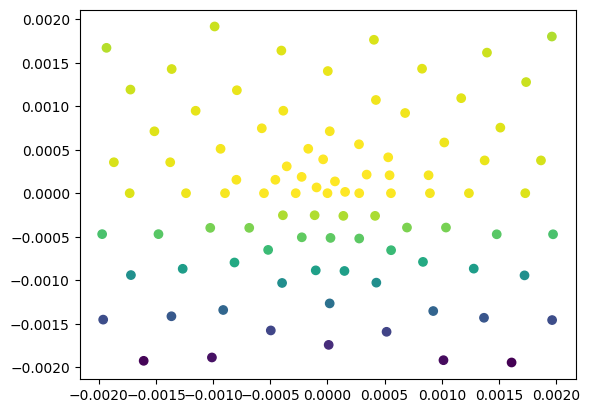

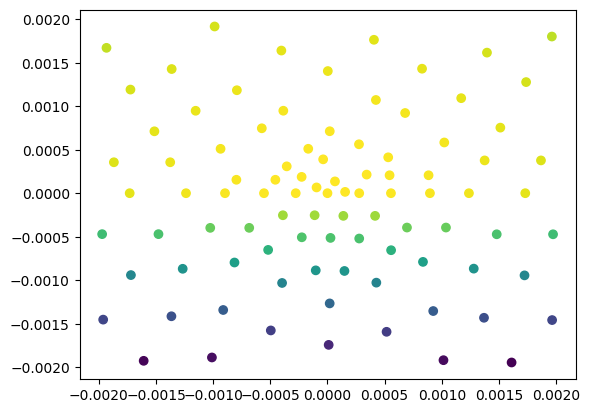

In [24]:
X_temp = torch.cat((X_values,y_values,temperatureValues,timeValues),1)
y_temp = futuretemperatureValues

X_temptemp = torch.cat((Xtemp_values,ytemp_values,temptemperatureValues,temptimeValues),1).to("cpu")
y_temptemp = temptemperatureValues.to("cpu")
X_train = torch.zeros(74400,4)
X_test = torch.zeros(95232-74400,4)
y_test = torch.zeros(95232-74400)

X_test= X_temptemp[74400:,:]

print(X_test.shape)
X_train = torch.zeros(74400,4)
X_train[:,0] = X_temp[:,0]
X_train[:,1] = X_temp[:,1]
X_train[:,2] = X_temp[:,2]
X_train[:,3] = X_temp[:,3]
y_train = y_temp

'''
X_train = torch.zeros(93,n*2+2)
X_test = torch.zeros(93,1026-(n)+len(time[n:]))
y_train = torch.zeros(93,len(Temperatures[:n,0]))
y_test = torch.zeros(93,len(Temperatures[n:,0]))
print(y_train.shape)
print(X_train.shape)
'''




'''
for i in range(len(Coordstemp[0])):
    Coords[i,0] = Coordstemp[0,i]
    Coords[i,1] = Coordstemp[1,i]
    X_train[i] = torch.cat((Coords[i],Temperatures[:n,i],time[:n]),0)
    X_test[i] = torch.cat((Coords[i],Temperatures[n:,i],time[n:]),0)
    y_train[i] = Temperatures[1:n+1,i]
    y_test[i] = Temperatures[n:,i]
'''
X_train = X_train.to("cpu")
X_test = X_test.to("cpu")
y_train = y_train.to("cpu")
y_test = y_test.to("cpu")
X_temp = X_temp.to("cpu")
y_temp = y_temp.to("cpu")
print(X_temptemp[2::1024,2].shape)
print(X_train.shape)
print(X_temptemp.shape)
plt.scatter(X_temptemp[::1024,0],X_temptemp[::1024,1],c=X_temptemp[1023::1024,2])
plt.figure()
plt.scatter(X_train[::800,0],X_train[::800,1],c=X_train[700::800,2])
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

## Setup loss and optimizerFunction

In [25]:
loss_fn = nn.MSELoss()



## Train and test loop


Epoch: 100 | Loss: 8.67354, Acc: 0.00% | Test loss: 108775.34375, Test acc: 0.00% | Learning Rate: 0.00100
Epoch: 200 | Loss: 8.64425, Acc: 0.00% | Test loss: 108779.62500, Test acc: 0.00% | Learning Rate: 0.00100
Epoch: 300 | Loss: 8.21670, Acc: 0.00% | Test loss: 108643.67969, Test acc: 0.00% | Learning Rate: 0.00100
Epoch: 400 | Loss: 8.02833, Acc: 0.00% | Test loss: 108830.93750, Test acc: 0.00% | Learning Rate: 0.00100
Epoch: 500 | Loss: 7.85549, Acc: 0.00% | Test loss: 108845.94531, Test acc: 0.00% | Learning Rate: 0.00100
Epoch: 600 | Loss: 7.77278, Acc: 0.00% | Test loss: 108807.73438, Test acc: 0.00% | Learning Rate: 0.00100
Epoch: 700 | Loss: 7.64267, Acc: 0.00% | Test loss: 108866.14062, Test acc: 0.00% | Learning Rate: 0.00100
Epoch: 800 | Loss: 7.56949, Acc: 0.00% | Test loss: 108901.67969, Test acc: 0.00% | Learning Rate: 0.00100
Epoch: 900 | Loss: 7.53115, Acc: 0.00% | Test loss: 108921.95312, Test acc: 0.00% | Learning Rate: 0.00100
Saving model to: models\TestModel2_Co

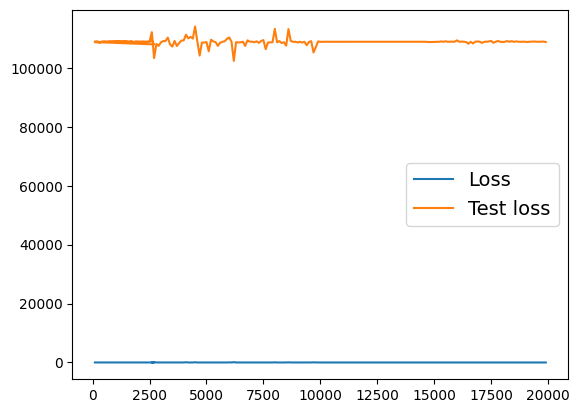

In [26]:
test_pred = torch.tensor(0)
y_pred = torch.tensor(0)
X_train = X_train.to(device).detach()
X_train, y_train = X_train.type(torch.float32), y_train.type(torch.float32)
X_test, y_test = X_test.type(torch.float32), y_test.type(torch.float32)
test_pred = test_pred.type(torch.float32)
y_pred = test_pred.type(torch.float32)
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

test_pred = test_pred.to(device)
y_pred = test_pred.type(torch.float32)



MODEL_PATH = Path("models")


MODEL_NAME = "TestModelCoordsNEW.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
x_physics = torch.linspace(0,10,150).view(-1,1).requires_grad_(True)# sample locations over the problem domain

X_train = X_train.requires_grad_(True)


y_pred,test_pred, loss, test_loss, epochs, learning_rates = TrainModel(model=modelTest2,epochs=20000, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test,
                    isClassification=False, loss_fn=loss_fn, lr=0.001)


loss = loss_values
test_loss = test_loss
epoch = epochs

#print(y_train[11,10])
#print(y_pred[11,10])
#fc.plot_predictions(X_train,y_train,X_test,y_test,y_pred,test_pred)
plt.figure()
plt.plot(epoch,loss,label="Loss")
plt.plot(epoch,test_loss,label="Test loss")
plt.legend(prop={"size": 14})
# 3. Save the models state_dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=modelTest2.state_dict(), f=MODEL_SAVE_PATH) # Can also just save the model

torch.Size([74400, 1])


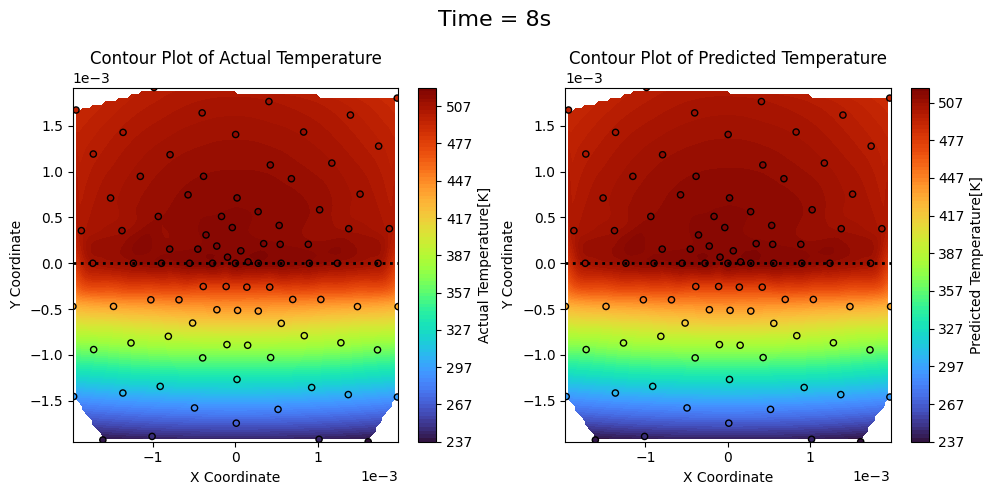

'\n\n\n# Convert PyTorch tensors to NumPy arrays\nx = X_temptemp[::1024, 0].detach().cpu().numpy()  # x-coordinates\ny = X_temptemp[::1024, 1].detach().cpu().numpy()  # y-coordinates\n\n# Reduce y_pred to a 1D array\nz = y_temptemp[800::1024].detach().cpu().numpy()  # Select the first output (adjust as needed)\n\n# Step 2: Create a grid for interpolation\ngrid_x, grid_y = np.mgrid[min(x):max(x):100j, min(y):max(y):100j]\n\n# Step 3: Interpolate the scattered data onto the grid\ngrid_z = griddata((x, y), z, (grid_x, grid_y), method=\'cubic\')\n\n# Fix grid_z to ensure it is 2D\ngrid_z = np.squeeze(grid_z)\nwatery = np.ones_like(grid_x[:,0])*0\nmembraney = np.ones_like(grid_x[:,0])*(-0.004)\n# Step 4: Plot the contour\nplt.figure(figsize=(10, 5))\n\ncontour = plt.contourf(grid_x, grid_y, grid_z, levels=100, cmap="turbo")\nplt.colorbar(contour, label="Actual Temperature[K]")\nplt.scatter(x, y, c=z, edgecolor=\'k\', cmap="turbo", s=20)  # Overlay training points\nplt.title("Contour Plot of

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Convert PyTorch tensors to NumPy arrays
x = X_train[::800, 0].detach().cpu().numpy()  # x-coordinates
y = X_train[::800, 1].detach().cpu().numpy()  # y-coordinates

# Reduce y_pred to a 1D array
z = y_train[799::800].detach().cpu().numpy()  # Select the first output (adjust as needed)
print(y_pred.shape)
# Step 2: Create a grid for interpolation
grid_x, grid_y = np.mgrid[min(x):max(x):100j, min(y):max(y):100j]

# Step 3: Interpolate the scattered data onto the grid
grid_z = griddata((x, y), z, (grid_x, grid_y), method='cubic')

# Fix grid_z to ensure it is 2D
grid_z = np.squeeze(grid_z)
watery = np.ones_like(grid_x[:,0])*0
membraney = np.ones_like(grid_x[:,0])*(-0.004)
# Step 4: Plot the contour
fig=plt.figure(figsize=(10, 5))
fig.suptitle('Time = 8s', fontsize=16)
plt.subplot(1,2,1)
contour = plt.contourf(grid_x, grid_y, grid_z, levels=100, cmap="turbo")
plt.colorbar(contour, label="Actual Temperature[K]")
plt.scatter(x, y, c=z, edgecolor='k', cmap="turbo", s=20)  # Overlay training points
plt.title("Contour Plot of Actual Temperature")
plt.plot(grid_x[:,0],watery, c="black", linewidth=2, linestyle = ":")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.ticklabel_format(axis='both', style='sci', scilimits=(-8,-3))


# Reduce y_pred to a 1D array
z = y_pred[799::800].detach().cpu().numpy()  # Select the first output (adjust as needed)
# Step 3: Interpolate the scattered data onto the grid
grid_z = griddata((x, y), z, (grid_x, grid_y), method='cubic')

# Fix grid_z to ensure it is 2D
grid_z = np.squeeze(grid_z)
plt.tight_layout()


plt.subplot(1,2,2)
contour = plt.contourf(grid_x, grid_y, grid_z, levels=100, cmap="turbo")
plt.colorbar(contour, label="Predicted Temperature[K]")
plt.contourf(grid_x, grid_y, grid_z, levels=100, cmap="turbo")
plt.scatter(x, y, c=z, edgecolor='k', cmap="turbo", s=20)  # Overlay training points
plt.title("Contour Plot of Predicted Temperature")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.plot(grid_x[:,0],watery, c="black", linewidth=2, linestyle = ":")
plt.ticklabel_format(axis='both', style='sci', scilimits=(-8,-3))
plt.tight_layout()
plt.show()








'''


# Convert PyTorch tensors to NumPy arrays
x = X_temptemp[::1024, 0].detach().cpu().numpy()  # x-coordinates
y = X_temptemp[::1024, 1].detach().cpu().numpy()  # y-coordinates

# Reduce y_pred to a 1D array
z = y_temptemp[800::1024].detach().cpu().numpy()  # Select the first output (adjust as needed)

# Step 2: Create a grid for interpolation
grid_x, grid_y = np.mgrid[min(x):max(x):100j, min(y):max(y):100j]

# Step 3: Interpolate the scattered data onto the grid
grid_z = griddata((x, y), z, (grid_x, grid_y), method='cubic')

# Fix grid_z to ensure it is 2D
grid_z = np.squeeze(grid_z)
watery = np.ones_like(grid_x[:,0])*0
membraney = np.ones_like(grid_x[:,0])*(-0.004)
# Step 4: Plot the contour
plt.figure(figsize=(10, 5))

contour = plt.contourf(grid_x, grid_y, grid_z, levels=100, cmap="turbo")
plt.colorbar(contour, label="Actual Temperature[K]")
plt.scatter(x, y, c=z, edgecolor='k', cmap="turbo", s=20)  # Overlay training points
plt.title("Contour Plot of Actual Temperature")
plt.plot(grid_x[:,0],watery, c="black", linewidth=2, linestyle = ":")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.ticklabel_format(axis='both', style='sci', scilimits=(-8,-3))
'''




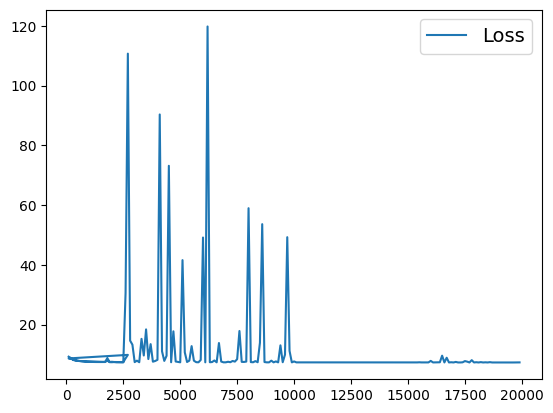

In [55]:
'''
files = []

for i in range(800):
# Convert PyTorch tensors to NumPy arrays
    x = X_train[::800, 0].detach().cpu().numpy()  # x-coordinates
    y = X_train[::800, 1].detach().cpu().numpy()  # y-coordinates

# Reduce y_pred to a 1D array
    z = y_train[i::800].detach().cpu().numpy()  # Select the first output (adjust as needed)
# Step 2: Create a grid for interpolation
    grid_x, grid_y = np.mgrid[min(x):max(x):100j, min(y):max(y):100j]

# Step 3: Interpolate the scattered data onto the grid
    grid_z = griddata((x, y), z, (grid_x, grid_y), method='cubic')

# Fix grid_z to ensure it is 2D
    grid_z = np.squeeze(grid_z)
    watery = np.ones_like(grid_x[:,0])*0
    membraney = np.ones_like(grid_x[:,0])*(-0.004)
# Step 4: Plot the contour
    fig = plt.figure(figsize=(10, 5))

    plt.subplot(1,2,1)
    contour = plt.contourf(grid_x, grid_y, grid_z, levels=100, cmap="turbo")
    plt.colorbar(contour, label="Actual Temperature[K]")
    plt.scatter(x, y, c=z, edgecolor='k', cmap="turbo", s=20)  # Overlay training points
    plt.title("Contour Plot of Actual Temperature")
    plt.plot(grid_x[:,0],watery, c="black", linewidth=2, linestyle = ":")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.ticklabel_format(axis='both', style='sci', scilimits=(-8,-3))


# Reduce y_pred to a 1D array
    z = y_pred[i::800].detach().cpu().numpy()  # Select the first output (adjust as needed)
# Step 3: Interpolate the scattered data onto the grid
    grid_z = griddata((x, y), z, (grid_x, grid_y), method='cubic')

# Fix grid_z to ensure it is 2D
    grid_z = np.squeeze(grid_z)
    plt.tight_layout()


    plt.subplot(1,2,2)
    contour = plt.contourf(grid_x, grid_y, grid_z, levels=100, cmap="turbo")
    plt.colorbar(contour, label="Predicted Temperature[K]")
    plt.contourf(grid_x, grid_y, grid_z, levels=100, cmap="turbo")
    plt.scatter(x, y, c=z, edgecolor='k', cmap="turbo", s=20)  # Overlay training points
    plt.title("Contour Plot of Predicted Temperature")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.plot(grid_x[:,0],watery, c="black", linewidth=2, linestyle = ":")
    plt.ticklabel_format(axis='both', style='sci', scilimits=(-8,-3))
    plt.tight_layout()
    
    
    files = SaveFigureForGIF(i,files)
    
save_gif_PIL("plots/nn_RealVsPredictedContour.gif",files)


'''

plt.plot(epoch,loss,label="Loss")
plt.legend(prop={"size": 14})


In [44]:

columns = defaultdict(list)
time = np.linspace(0, 10, 1024)

with open('FullTable.csv') as f:
    reader = csv.reader(f)
    next(reader)
    for row in reader:
        for (i,v) in enumerate(row):
            columns[i].append(v)


tempTensor = torch.tensor(torch.zeros(len(columns),len(columns[1]))).to(device)



for i in range(len(columns)):
    tempArray = []
    for j in range(len(columns[1])):
        tempArray.append(float(columns[i][j]))
    tempTensor[i] = torch.tensor(tempArray)



Coordstemp = tempTensor[0:2][:]


X_values = torch.ones_like(tempTensor[2:len(tempTensor)][:]).reshape(-1,1).to(device)
y_values = torch.ones_like(tempTensor[2:len(tempTensor)][:]).reshape(-1,1).to(device)
temperatureValues = torch.ones_like(tempTensor[2:len(tempTensor)][:]).reshape(-1,1).to(device)
timeValues = torch.ones_like(tempTensor[2:len(tempTensor)][:]).reshape(-1,1).to(device)






#for j in range(len(tempTensor[2:len(tempTensor)])):





print(X_values.shape)


for i in range(len(Coordstemp[0])):
    for j in range(len(tempTensor[2:len(tempTensor)])):
        X_values[j+len(tempTensor[2:len(tempTensor)])*i] = tempTensor[0,i]
        y_values[j+len(tempTensor[2:len(tempTensor)])*i] = tempTensor[1,i]
        temperatureValues[j+len(tempTensor[2:len(tempTensor)])*i] = tempTensor[j+2][i]
        timeValues[j+len(tempTensor[2:len(tempTensor)])*i] = time[j]

X_temp = torch.cat((X_values,y_values,temperatureValues,timeValues),1)
print(X_temp.shape)
y_test = torch.zeros(95232)

y_test = modelTest2(X_temp)




C:\Users\dexti\AppData\Local\Temp\ipykernel_17000\1889882039.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tempTensor = torch.tensor(torch.zeros(len(columns),len(columns[1]))).to(device)


torch.Size([95232, 1])
torch.Size([95232, 4])


'\n\nXtemp_values = torch.ones_like(tempTensor[2:len(tempTensor)][:]).reshape(-1,1).to(device)\nytemp_values = torch.ones_like(tempTensor[2:len(tempTensor)][:]).reshape(-1,1).to(device)\ntemptemperatureValues = torch.ones_like(tempTensor[2:len(tempTensor)][:]).reshape(-1,1).to(device)\ntemptimeValues = torch.ones_like(tempTensor[2:len(tempTensor)][:]).reshape(-1,1).to(device)\n\n\nfor i in range(len(Coordstemp[0])):\n    for j in range(len(tempTensor[2:len(tempTensor)])):\n        Xtemp_values[j+len(tempTensor[2:len(tempTensor)])*i] = tempTensor[0,i]\n        ytemp_values[j+len(tempTensor[2:len(tempTensor)])*i] = tempTensor[1,i]\n        temptemperatureValues[j+len(tempTensor[2:len(tempTensor)])*i] = tempTensor[j+2][i]\n        temptimeValues[j+len(tempTensor[2:len(tempTensor)])*i] = time[j]\n'

torch.Size([74400, 1])
1.3146971


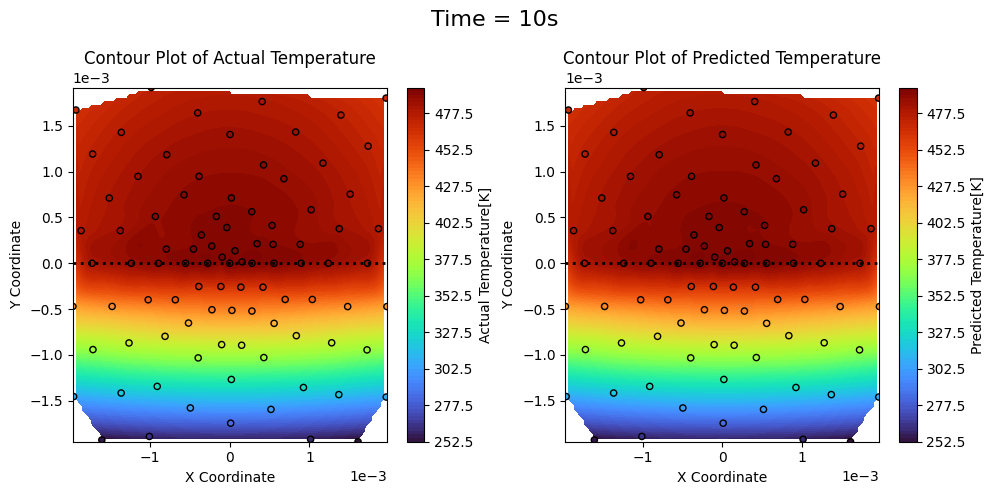

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Convert PyTorch tensors to NumPy arrays
x = X_temp[::1024, 0].detach().cpu().numpy()  # x-coordinates
y = X_temp[::1024, 1].detach().cpu().numpy()  # y-coordinates

# Reduce y_pred to a 1D array
z = temperatureValues[1023::1024].detach().cpu().numpy()  # Select the first output (adjust as needed)
print(y_pred.shape)
# Step 2: Create a grid for interpolation
grid_x, grid_y = np.mgrid[min(x):max(x):100j, min(y):max(y):100j]

# Step 3: Interpolate the scattered data onto the grid
grid_z = griddata((x, y), z, (grid_x, grid_y), method='cubic')

# Fix grid_z to ensure it is 2D
grid_z = np.squeeze(grid_z)
watery = np.ones_like(grid_x[:,0])*0
membraney = np.ones_like(grid_x[:,0])*(-0.004)
# Step 4: Plot the contour
fig=plt.figure(figsize=(10, 5))
fig.suptitle('Time = 10s', fontsize=16)
plt.subplot(1,2,1)
contour = plt.contourf(grid_x, grid_y, grid_z, levels=100, cmap="turbo")
plt.colorbar(contour, label="Actual Temperature[K]")
plt.scatter(x, y, c=z, edgecolor='k', cmap="turbo", s=20)  # Overlay training points
plt.title("Contour Plot of Actual Temperature")
plt.plot(grid_x[:,0],watery, c="black", linewidth=2, linestyle = ":")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.ticklabel_format(axis='both', style='sci', scilimits=(-8,-3))
print(torch.mean((y_test[800:]-temperatureValues[800:])**2).to("cpu").detach().numpy())




# Reduce y_pred to a 1D array
z = y_test[1023::1024].detach().cpu().numpy()  # Select the first output (adjust as needed)
# Step 3: Interpolate the scattered data onto the grid
grid_z = griddata((x, y), z, (grid_x, grid_y), method='cubic')

# Fix grid_z to ensure it is 2D
grid_z = np.squeeze(grid_z)
plt.tight_layout()


plt.subplot(1,2,2)
contour = plt.contourf(grid_x, grid_y, grid_z, levels=100, cmap="turbo")
plt.colorbar(contour, label="Predicted Temperature[K]")
plt.contourf(grid_x, grid_y, grid_z, levels=100, cmap="turbo")
plt.scatter(x, y, c=z, edgecolor='k', cmap="turbo", s=20)  # Overlay training points
plt.title("Contour Plot of Predicted Temperature")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.plot(grid_x[:,0],watery, c="black", linewidth=2, linestyle = ":")
plt.ticklabel_format(axis='both', style='sci', scilimits=(-8,-3))
plt.tight_layout()
plt.show()

